In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch 
import cv2
import numpy as np
import matplotlib.image as mpimg
import math
import sys
import os
from scipy import signal as sig
from numpy import linalg as LA

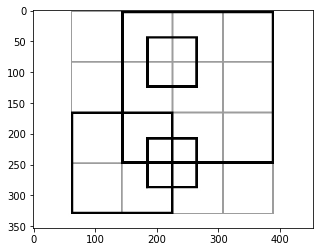

In [2]:
temp_image = cv2.imread('box.jpg')
image = cv2.cvtColor(temp_image,cv2.COLOR_BGR2GRAY)
colour_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap = 'gray')

In [3]:
kernel_x = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1] ]
kernel_y = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]

In [4]:
def find_gradient(imggray):
    return sig.convolve2d(imggray, kernel_x, mode='same') , sig.convolve2d(imggray, kernel_y, mode='same')

In [5]:
gx,gy = find_gradient(image)

In [6]:
print(gy)

[[ -765     0     0 ...     0     0   765]
 [-1020     0     0 ...     0     0  1020]
 [-1020     0     0 ...     0     0  1020]
 ...
 [-1020     0     0 ...     0     0  1020]
 [-1020     0     0 ...     0     0  1020]
 [ -765     0     0 ...     0     0   765]]


In [7]:
Ixx = gx**2
Iyy = gy**2
Ixy = gx+gy

In [8]:
print(Ixx)

[[ 585225 1040400 1040400 ... 1040400 1040400  585225]
 [      0       0       0 ...       0       0       0]
 [      0       0       0 ...       0       0       0]
 ...
 [      0       0       0 ...       0       0       0]
 [      0       0       0 ...       0       0       0]
 [ 585225 1040400 1040400 ... 1040400 1040400  585225]]


In [9]:
window_size = 4
offset = int(window_size/2)

In [10]:
img_corners = np.copy(colour_image)
img_edges = np.copy(colour_image)

In [11]:
for y in range(offset,image.shape[0]-offset):
    for x in range(offset, image.shape[1]-offset):
        patch_Ixx = Ixx[y-offset:y+offset+1,x-offset:x+offset+1]
        patch_Iyy = Iyy[y-offset:y+offset+1,x-offset:x+offset+1]
        patch_Ixy = Ixy[y-offset:y+offset+1,x-offset:x+offset+1]
        
        Sum_xx = patch_Ixx.sum()
        Sum_xy = patch_Ixy.sum()
        Sum_yy = patch_Iyy.sum()
        det = (Sum_xx * Sum_yy) - (Sum_xy**2)
        trace = Sum_xx + Sum_yy
        
        R = det - 0.06*(trace**2)
        
        if R>0:
            #print(R)
            img_corners.itemset((y,x,0),0)
            img_corners.itemset((y,x,1),0)
            img_corners.itemset((y,x,2),255)
        else:
            img_edges.itemset((y,x,0),0)
            img_edges.itemset((y,x,1),0)
            img_edges.itemset((y,x,0),255)

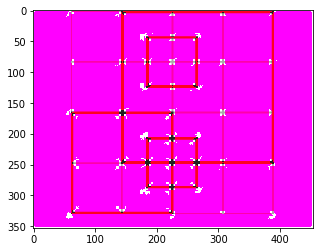

In [12]:
plt.imshow(img_edges)

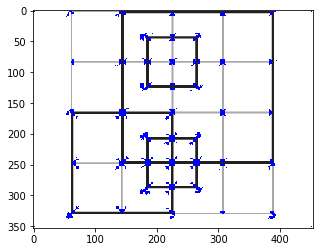

In [13]:
plt.imshow(img_corners)

In [20]:
gy,gx = np.gradient(image)

In [21]:
Ixx = gx**2
Iyy = gy**2
Ixy = gx+gy

In [22]:
shi_thomasi = np.zeros((image.shape))

In [23]:
for y in range(offset,image.shape[0]-offset):
    for x in range(offset, image.shape[1]-offset):
        patch_Ixx = Ixx[y-offset:y+offset+1,x-offset:x+offset+1]
        patch_Iyy = Iyy[y-offset:y+offset+1,x-offset:x+offset+1]
        patch_Ixy = Ixy[y-offset:y+offset+1,x-offset:x+offset+1]
        
        Sum_xx = patch_Ixx.sum()
        Sum_xy = patch_Ixy.sum()
        Sum_yy = patch_Iyy.sum()
        M = [[Sum_xx,Sum_xy],[Sum_xy,Sum_yy]]
        M = np.asarray(M)
        w, v = LA.eig(M)
        #print(w)
        R2 = min(w)
        shi_thomasi[y][x] = R2
        if R2>0:
            #print(R2)
            img_corners.itemset((y,x,0),0)
            img_corners.itemset((y,x,1),255)
            img_corners.itemset((y,x,2),0)
        else:
            #print(R2)
            img_edges.itemset((y,x,0),0)
            img_edges.itemset((y,x,1),0)
            img_edges.itemset((y,x,0),255)

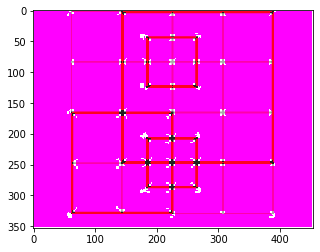

In [24]:
plt.imshow(img_edges)

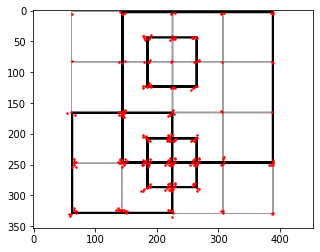

In [25]:
from skimage.feature import corner_peaks
corners = corner_peaks(shi_thomasi)
fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=3)